## Observations and Insights

1. Capomulin and Ramicane regimens are the ones with smaller sample SEM, which means their mean is closer to the population mean. Capomulin and Ramicane are also the regimens with higher number of data points.
2. Tumor Volume decreases dramatically with time for mouse l509 with Capomulin treatment.
3. The range of the Tumor Volumes is higher in Infubinol and Ceftamin than in Capomulin and Ramicane and most of these regimens don't have outliers.
4. At least for the Capomulin regimen, there is a high positive relation between the Mouse Weight and the Average Tumor Volume, meaning that the higher the Mouse Weight is, the higher the Tumor Volume could be.

## Dependencies and starter code

In [556]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [557]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = combined_data.groupby('Drug Regimen')

volume_mean = regimen['Tumor Volume (mm3)'].mean()

volume_median = regimen['Tumor Volume (mm3)'].median()

volume_variance = regimen['Tumor Volume (mm3)'].var()

volume_stddev = regimen['Tumor Volume (mm3)'].std()

volume_sem = regimen['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean": volume_mean,
                                "Median": volume_median,
                                "Variance": volume_variance,
                                "Standard Deviation": volume_stddev,
                                "SEM": volume_sem})

summary_statistics["Mean"] = summary_statistics["Mean"].map("{:.2f}".format)
summary_statistics["Median"] = summary_statistics["Median"].map("{:,.2f}".format)
summary_statistics["Variance"] = summary_statistics["Variance"].map("{:,.2f}".format)
summary_statistics["Standard Deviation"] = summary_statistics["Standard Deviation"].map("{:,.2f}".format)
summary_statistics["SEM"] = summary_statistics["SEM"].map("{:,.2f}".format)

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

(0, 250)

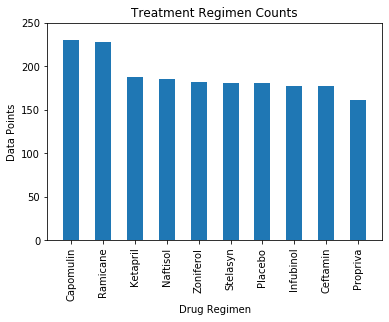

In [558]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = regimen['Drug Regimen'].count().sort_values(ascending=False)

data_points.plot(kind="bar", width = 0.5)

plt.title("Treatment Regimen Counts")
plt.ylabel("Data Points")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points)+20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

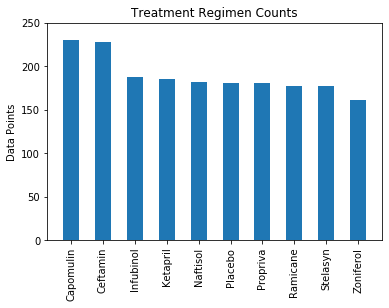

In [559]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = regimen.groups.keys()
x_axis

plt.bar(x_axis, data_points, width = 0.5)
plt.title("Treatment Regimen Counts")
plt.ylabel('Data Points')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points)+20)
plt.xticks(rotation = 90)

## Pie plots

Text(0, 0.5, '')

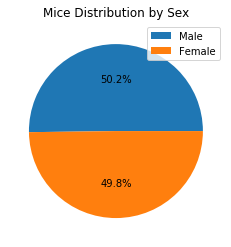

In [560]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_unique = combined_data[['Sex','Mouse ID']].drop_duplicates()
distribution = sex_unique['Sex'].value_counts()
distribution.plot(kind="pie", autopct='%1.1f%%', startangle=360, legend = True, labels = None)
plt.title('Mice Distribution by Sex')
plt.ylabel('')

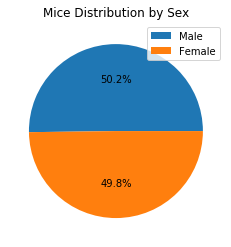

In [561]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distribution, autopct='%1.1f%%', startangle=360, labels = None)
plt.title('Mice Distribution by Sex')
plt.legend(distribution.keys())

## Quartiles, outliers and boxplots

In [562]:
final_tumor_vol = combined_data.groupby(['Drug Regimen', 'Mouse ID'])
final_num = final_tumor_vol['Tumor Volume (mm3)'].last()
final_tumor_vol_summary = pd.DataFrame({'Final Tumor Volume (mm3)': final_num})
final_tumor_vol_summary.reset_index()

,Drug Regimen,Mouse ID,Final Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
244,Zoniferol,q633,70.827796
245,Zoniferol,s337,62.109651
246,Zoniferol,w140,47.717952
247,Zoniferol,w575,68.401286


In [563]:
#Four most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
combined_data_capomulin = final_tumor_vol_summary.loc['Capomulin']

combined_data_ramicane = final_tumor_vol_summary.loc['Ramicane']

combined_data_infubinol = final_tumor_vol_summary.loc['Infubinol']

combined_data_ceftamin = final_tumor_vol_summary.loc['Ceftamin']

In [564]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin
quartiles_capomulin = combined_data_capomulin["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_capomulin = round(quartiles_capomulin[0.25],2)
upperq_capomulin = round(quartiles_capomulin[0.75],2)
median_capomulin = round(quartiles_capomulin[0.50],2)
iqr_capomulin = round(upperq_capomulin-lowerq_capomulin,2)

print("For Capomulin:")
print(f"The lower quartile of tumor volume is: {lowerq_capomulin}")
print(f"The upper quartile of tumor volume is: {upperq_capomulin}")
print(f"The interquartile range of tumor volume is: {iqr_capomulin}")
print(f"The median of tumor volume is: {median_capomulin}")

lower_bound_capomulin = round(lowerq_capomulin - (1.5*iqr_capomulin),2)
upper_bound_capomulin = round(upperq_capomulin + (1.5*iqr_capomulin),2)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")
print("-------------------------------------------------")

#Ramicane
quartiles_ramicane = combined_data_ramicane["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ramicane = round(quartiles_ramicane[0.25],2)
upperq_ramicane = round(quartiles_ramicane[0.75],2)
median_ramicane = round(quartiles_ramicane[0.50],2)
iqr_ramicane = round(upperq_ramicane-lowerq_ramicane,2)

print("For Ramicane:")
print(f"The lower quartile of tumor volume is: {lowerq_ramicane}")
print(f"The upper quartile of tumor volume is: {upperq_ramicane}")
print(f"The interquartile range of tumor volume is: {iqr_ramicane}")
print(f"The median of tumor volume is: {median_ramicane}")

lower_bound_ramicane = round(lowerq_ramicane - (1.5*iqr_ramicane),2)
upper_bound_ramicane = round(upperq_ramicane + (1.5*iqr_ramicane),2)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")
print("-------------------------------------------------")

#Infubinol
quartiles_infubinol = combined_data_infubinol["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_infubinol = round(quartiles_infubinol[0.25],2)
upperq_infubinol = round(quartiles_infubinol[0.75],2)
median_infubinol = round(quartiles_infubinol[0.50],2)
iqr_infubinol = round(upperq_infubinol-lowerq_infubinol,2)

print("For Infubinol:")
print(f"The lower quartile of tumor volume is: {lowerq_infubinol}")
print(f"The upper quartile of tumor volume is: {upperq_infubinol}")
print(f"The interquartile range of tumor volume is: {iqr_infubinol}")
print(f"The median of tumor volume is: {median_infubinol}")

lower_bound_infubinol = round(lowerq_infubinol - (1.5*iqr_infubinol),2)
upper_bound_infubinol = round(upperq_infubinol + (1.5*iqr_infubinol),2)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")
print("-------------------------------------------------")

#Ceftamin
quartiles_ceftamin = combined_data_ceftamin["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ceftamin = round(quartiles_ceftamin[0.25],2)
upperq_ceftamin = round(quartiles_ceftamin[0.75],2)
median_ceftamin = round(quartiles_ceftamin[0.50],2)
iqr_ceftamin = round(upperq_ceftamin-lowerq_ceftamin,2)

print("For Ceftamin:")
print(f"The lower quartile of tumor volume is: {lowerq_ceftamin}")
print(f"The upper quartile of tumor volume is: {upperq_ceftamin}")
print(f"The interquartile range of tumor volume is: {iqr_ceftamin}")
print(f"The median of tumor volume is: {median_ceftamin}")

lower_bound_ceftamin = round(lowerq_ceftamin - (1.5*iqr_ceftamin),2)
upper_bound_ceftamin = round(upperq_ceftamin + (1.5*iqr_ceftamin),2)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

For Capomulin:
The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The median of tumor volume is: 38.13
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
-------------------------------------------------
For Ramicane:
The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.1
The median of tumor volume is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
-------------------------------------------------
For Infubinol:
The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The median of tumor volume is: 60.17
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
-------------------------------------------------
For Ceftamin:
The lower quartile of tumor volume i

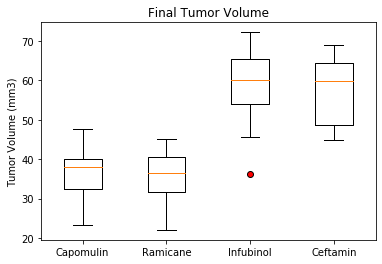

In [565]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume')
ax.set_ylabel('Tumor Volume (mm3)')
red_outliers = dict(markerfacecolor='r', marker='o')
ax.boxplot([combined_data_capomulin["Final Tumor Volume (mm3)"], 
             combined_data_ramicane["Final Tumor Volume (mm3)"], 
             combined_data_infubinol["Final Tumor Volume (mm3)"],
             combined_data_ceftamin["Final Tumor Volume (mm3)"]], flierprops=red_outliers)
positions = (1, 2, 3, 4)
labels = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
plt.xticks(positions, labels)
plt.show()

## Line and scatter plots

Text(0.5, 0, 'Timepoint (days)')

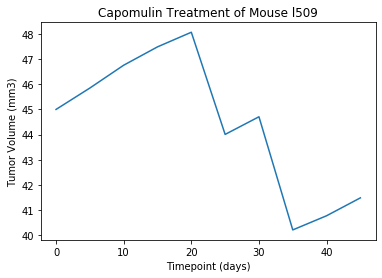

In [566]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_combined_data = combined_data.set_index('Mouse ID')
mouse_combined_data.head()
one_mouse = mouse_combined_data.loc['l509']

time = one_mouse['Timepoint']
vol = one_mouse['Tumor Volume (mm3)']

plt.plot(time,vol)
plt.title("Capomulin Treatment of Mouse l509")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

Text(0.5, 0, 'Weight (g)')

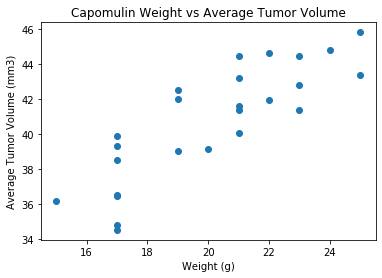

In [567]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#final_tumor_vol = combined_data.groupby(['Drug Regimen', 'Mouse ID'])
avg_vol = final_tumor_vol['Tumor Volume (mm3)'].mean()
first_weight = final_tumor_vol['Weight (g)'].first()
avg_tumor_vol_summary = pd.DataFrame({'Avg Tumor Volume (mm3)': avg_vol,
                                      'Weight (g)': first_weight     
                                     })
avg_tumor_vol_summary.reset_index()

scatter_data = avg_tumor_vol_summary.loc['Capomulin']

mouse_weight = scatter_data['Weight (g)']
avg_vols = scatter_data['Avg Tumor Volume (mm3)']

plt.scatter(mouse_weight, avg_vols)
plt.title("Capomulin Weight vs Average Tumor Volume")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

The correlation coefficient between both factors is 0.84


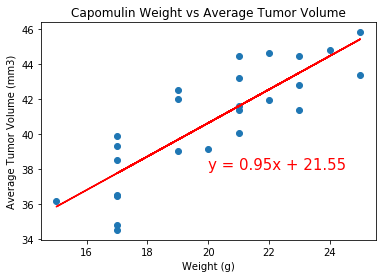

In [587]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_vols)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_vols)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_vols)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Capomulin Weight vs Average Tumor Volume")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()